<a href="https://colab.research.google.com/github/RAVINA-SHAN/RAVINA-SHAN/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving WhatsApp Image 2025-06-06 at 11.33.46_dac72b27.jpg to WhatsApp Image 2025-06-06 at 11.33.46_dac72b27 (2).jpg
Loaded image: WhatsApp Image 2025-06-06 at 11.33.46_dac72b27 (2).jpg


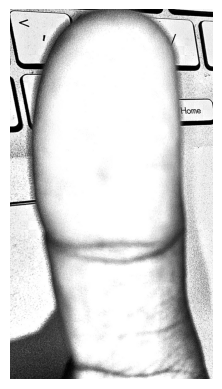

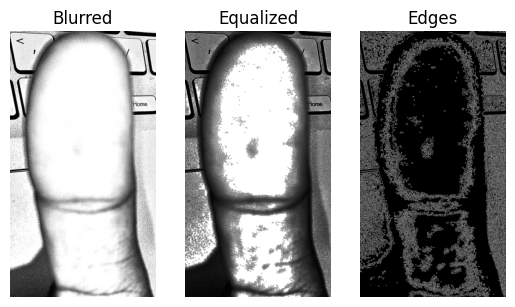

In [11]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Upload image
uploaded = files.upload()

filename = list(uploaded.keys())[0]
file_bytes = np.frombuffer(uploaded[filename], np.uint8)
img = cv2.imdecode(file_bytes, cv2.IMREAD_GRAYSCALE)

if img is None:
    print("Failed to load image.")
else:
    print(f"Loaded image: {filename}")
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

    # Example processing
    blurred = cv2.GaussianBlur(img, (5, 5), 0)
    equalized = cv2.equalizeHist(blurred)
    edges = cv2.Canny(equalized, 30, 100)

    plt.subplot(1,3,1)
    plt.title("Blurred")
    plt.imshow(blurred, cmap='gray')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.title("Equalized")
    plt.imshow(equalized, cmap='gray')
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.title("Edges")
    plt.imshow(edges, cmap='gray')
    plt.axis('off')

    plt.show()


Saving Untitled.png to Untitled.png


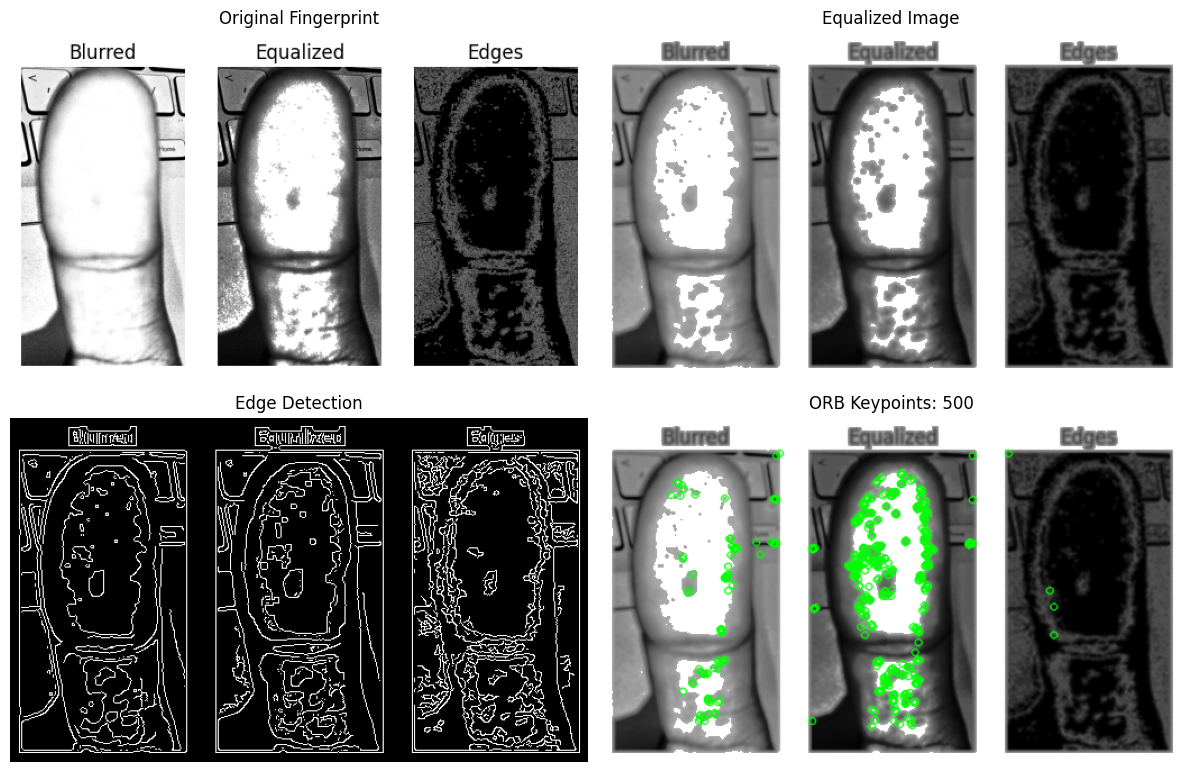

In [12]:
# Upload and process fingerprint image in Colab

from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Upload image
uploaded = files.upload()

filename = list(uploaded.keys())[0]
file_bytes = np.frombuffer(uploaded[filename], np.uint8)
img = cv2.imdecode(file_bytes, cv2.IMREAD_GRAYSCALE)

if img is None:
    raise ValueError("Image load failed.")

# Image Processing
blurred = cv2.GaussianBlur(img, (5, 5), 0)
equalized = cv2.equalizeHist(blurred)
edges = cv2.Canny(equalized, 30, 100)

orb = cv2.ORB_create()
keypoints, descriptors = orb.detectAndCompute(equalized, None)
img_with_keypoints = cv2.drawKeypoints(equalized, keypoints, None, color=(0,255,0), flags=0)

# Display results
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.title("Original Fingerprint")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(2,2,2)
plt.title("Equalized Image")
plt.imshow(equalized, cmap='gray')
plt.axis('off')

plt.subplot(2,2,3)
plt.title("Edge Detection")
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.subplot(2,2,4)
plt.title(f"ORB Keypoints: {len(keypoints)}")
plt.imshow(img_with_keypoints, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
